In [1]:
import json

In [2]:
with open("data/bus_stop_full_info.json") as f:
    bus_data = json.load(f)

In [3]:
def get_rolling_window(hour_list):
    rw_list=[0]*(len(hour_list))
    if hour_list[0]!=0:
        sum=int((hour_list[0]+hour_list[len(hour_list)-1-1]+hour_list[len(hour_list)-1-2])/3)
        rw_list[0]=sum
    else: hour_list[0]=0
    if hour_list[1]!=0:
        rw_list[1]=int((hour_list[1]+hour_list[0]+hour_list[len(hour_list)-1-1])/3)
    else: hour_list[1]=0
    
    for i in range(2, len(hour_list)):
        if hour_list[i]!=0:
            rw_list[i]=int((hour_list[i]+hour_list[i-1]+hour_list[i-2])/3)
    else: hour_list[i]=0

    return rw_list

    

In [7]:
def find_peak_hours(arr):
 
    # Empty lists to store points of
    # local maxima and minima
    mx = []
 
    # Checking whether the first point is
    # local maxima or minima or neither

    for i in range(len(arr)):
        # Condition for local maxima
        if(arr[i-1] < arr[i] > arr[i + 1]):
            mx.append(i)

    if(arr[-1] > arr[-2]):
        mx.append(len(arr)-1)
    if 0 in mx:
        mx.remove(0)
    print(mx)
    return mx

In [12]:
err_count=0
for i in bus_data.keys():
    try:
        weekdays=bus_data[i]["weekdays"]
        wd_rw_list_in=get_rolling_window(weekdays['tap_in'])
        wd_rw_list_out=get_rolling_window(weekdays['tap_out'])
        bus_data[i]["weekdays"]["rw_tap_in"]= wd_rw_list_in
        bus_data[i]["weekdays"]["rw_tap_in"]= wd_rw_list_out
        peak_hours_in=find_peak_hours(wd_rw_list_in)
        peak_hours_out=find_peak_hours(wd_rw_list_out)
        bus_data[i]["weekdays"]["peak_hours_in"]= peak_hours_in
        bus_data[i]["weekdays"]["peak_hours_out"]= peak_hours_out
        weekends=bus_data[i]["weekends"]
        we_rw_list_in=get_rolling_window(weekends['tap_in'])
        we_rw_list_out=get_rolling_window(weekends['tap_out'])
        bus_data[i]["weekends"]["rw_tap_in"]= we_rw_list_in
        bus_data[i]["weekends"]["rw_tap_in"]= we_rw_list_out
        peak_hours_in=find_peak_hours(we_rw_list_in)
        peak_hours_out=find_peak_hours(we_rw_list_out)
        bus_data[i]["weekends"]["peak_hours_in"]= peak_hours_in
        bus_data[i]["weekends"]["peak_hours_out"]= peak_hours_out

    except:
        print("error in bus stop", bus_data[i]["RoadName"])
        err_count+=1
print(err_count)

    

[8, 19]
[8, 13, 18]
[20]
[13, 18]
[9, 19]
[9, 16]
[14, 20]
[13]
[8, 14, 18]
[8, 14, 18]
[10]
[11, 17]
[8, 18]
[8, 13, 19]
[10, 14, 20]
[8, 13, 19]
[9, 18]
[9, 14, 19]
[10, 12, 19]
[9, 14, 19]
[9, 13, 19]
[8, 19]
[12, 18]
[9, 19]
[9, 14, 19]
[9, 16, 18]
[10, 18]
[13, 18, 20]
[9, 15, 17]
[8, 13, 19]
[12, 16, 21]
[12, 14, 19]
[8, 15]
[7, 18]
[15, 18]
[1, 9, 14, 16, 18]
[9, 15, 17]
[8, 11, 14]
[12]
[11]
[9, 14]
[9, 19]
[13, 17]
[10, 15, 19]
[9, 14, 17]
[9, 13, 19]
[12, 21]
[10, 19]
[8, 13, 15]
[9, 19]
[12, 16]
[10, 14, 19]
[9, 13, 19]
[9, 19]
[10]
[9, 21]
[8, 13, 19]
[9, 15, 17]
[10, 18]
[9, 20]
[9, 15, 17]
[8, 15]
[11, 15, 18]
[14, 16, 18]
[8, 13, 18]
[9, 15, 17]
[]
[8, 14, 19]
[8, 18]
[9, 15, 19]
[11, 17]
[]
[8, 18]
[8, 18]
[11, 18]
[10, 13, 18]
[9, 13, 18]
[9, 15]
[12, 18]
[10, 13, 20]
[8, 18]
[9, 14, 18]
[10, 16, 18]
[11, 13, 15, 18]
[9, 12, 18]
[10, 14, 19]
[11, 19]
[11, 19]
[8, 13, 18]
[9, 14, 17]
[11, 18]
[10, 13, 19]
[9, 13, 19]
[9, 13, 16, 19]
[13, 21]
[11, 19]
[9, 15, 18]
[10, 16

In [19]:
err_count=0
hour_map={}
for i in bus_data.keys():
    try:
        peak_hrs_list=bus_data[i]["weekdays"]["peak_hours_in"]+bus_data[i]["weekdays"]["peak_hours_out"]+bus_data[i]["weekends"]["peak_hours_in"]+bus_data[i]["weekends"]["peak_hours_out"]
        for hr in peak_hrs_list:
            if hr in hour_map.keys():
                hour_map[hr]+=1
            else:
                hour_map[hr]=1
    except:
        print("error in bus stop", bus_data[i]["RoadName"])
        err_count+=1
print(err_count)

error in bus stop Tampines Ave 12
error in bus stop Tampines Ave 12
error in bus stop Tampines Ave 12
error in bus stop Hougang Ave 10
error in bus stop Jln Gali Batu
error in bus stop Old Choa Chu Kang Rd
error in bus stop Old Choa Chu Kang Rd
error in bus stop Old Choa Chu Kang Rd
error in bus stop Old Choa Chu Kang Rd
error in bus stop Old Choa Chu Kang Rd
error in bus stop Old Choa Chu Kang Rd
error in bus stop Old Choa Chu Kang Rd
error in bus stop Lim Chu Kang Rd
error in bus stop Lim Chu Kang Rd
error in bus stop Yishun Ave 6
error in bus stop Yishun Ave 6
error in bus stop Yishun Ave 6
error in bus stop Yishun Ave 6
error in bus stop Senja Link
19


In [20]:
print(hour_map)

{8: 5922, 19: 6834, 13: 3272, 18: 5811, 20: 1958, 9: 4532, 16: 1248, 14: 2866, 10: 2212, 11: 1738, 17: 2348, 12: 2201, 15: 2561, 21: 1169, 7: 184, 1: 50, 22: 1169, 3: 16, 4: 10, 6: 36, 2: 19, 5: 7}


In [23]:
import matplotlib.pyplot as plt

<BarContainer object of 22 artists>

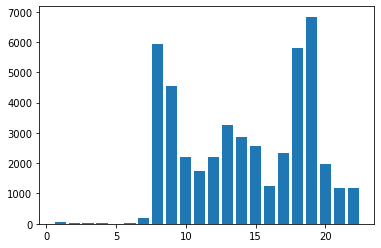

In [25]:
plt.bar(hour_map.keys(), hour_map.values())